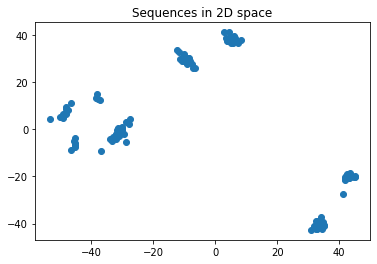

In [34]:
import pandas as pd
import pickle
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def ham_distance(str1,str2):
    #finding hamming distance
    return sum(xi != yi for xi, yi in zip(str1, str2))

def save_df(dna_df, hamming_dist_df, sequences):
    dna_df.to_csv('hw2_dna.csv')
    hamming_dist_df.to_csv('hw2_ham.csv')
    with open('sequences.pkl','wb') as w:
        pickle.dump(sequences, w)
def Euclidian_distance(m,Centroids,clusters_cnt,df):
    EuclidianDistance=np.array([]).reshape(m,0)
    for i in range(clusters_cnt):
        temp=np.sum((df-Centroids[:,i])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,temp]
    return np.argmin(EuclidianDistance,axis=1) + 1
def kmeans_clustering(file, clusters_cnt, mode):
        df = pd.read_csv(file,index_col=0)
        m = df.shape[0]
        n = df.shape[1]
        n_iter=100
        Centroids=np.array([]).reshape(n,0)
        #assigning random clusters initially
        for i in range(clusters_cnt):
            rand=rd.randint(0,m-1)
            Centroids=np.c_[Centroids,df.iloc[rand]]
        Output={}
        C = Euclidian_distance(m,Centroids,clusters_cnt,df)
        Y={}
        #iterations for finding clusters
        for i in range(clusters_cnt):
            Y[i+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],df.iloc[i]]        
        for i in range(clusters_cnt):
            Y[i+1]=Y[i+1].T        
        for i in range(clusters_cnt):
            Centroids[:,i]=np.mean(Y[i+1],axis=0)
        for i in range(n_iter):
            C=Euclidian_distance(m,Centroids,clusters_cnt,df)
            Y={}
            for k in range(clusters_cnt):
                Y[k+1]=np.array([]).reshape(2,0)
            for k in range(m):
                Y[C[k]]=np.c_[Y[C[k]],df.iloc[k]]
            for k in range(clusters_cnt):
                Y[k+1]=Y[k+1].T
            for k in range(clusters_cnt):
                Centroids[:,k]=np.mean(Y[k+1],axis=0)
            if i > 0 and all(np.array_equal(Y[key], Output[key]) for key in Y):
                break
            Output = Y
        color=['pink','yellow','blue','green','brown','cyan']
        labels=['cluster1','cluster2','cluster3','cluster4', 'cluster5', 'cluster6']
        for k in range(clusters_cnt):
            plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
        plt.scatter(Centroids[0,:],Centroids[1,:],s=30,c='black',label='Centroids')
        plt.legend()
        plt.show('clustered_{}_{}.png'.format(clusters_cnt, mode))
        plt.clf()
        return Output, Centroids
    
def sum_of_squares(Output,Centroids,num_clusters):
        sum_of_squares = 0
        Centroids = Centroids.T
        for k in range(num_clusters):
            sum_of_squares = sum_of_squares + np.sum((Output[k+1] - Centroids[k,:]**2))
        return sum_of_squares

def main():
    # Reading the file and creating sequences, dna and dna string
    sequences = []
    dna_set = []
    dna_string_set = []
    with open("HW2.fas",'r') as f:
        c = 0
        for i in f:
            if c % 2 == 0:
                sequences.append(i[1:-1])
            if c % 2 == 1:
                dna_set.append(list(i[:-1]))
                dna_string_set.append(i[:-1])
            c = c + 1

    #converting dna into a dataframe
    dna_df = pd.DataFrame(dna_set)
    dna_df.to_csv('hw2_string.csv')
    DNA = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
    dna_df.replace(to_replace=DNA, inplace=True)
    #print(dna_df)

    #generating hamming distance matrix
    length = len(dna_string_set)
    dist = []
    for i in range(length):
        dist.append([0] * length)
    for i in range(length):
        for j in range(i + 1, length):
            hamming_dist = ham_distance(dna_string_set[i], dna_string_set[j])
            dist[i][j],dist[j][i] = hamming_dist, hamming_dist
    hamming_dist_df = pd.DataFrame(dist)
    save_df(dna_df,hamming_dist_df,sequences)
    
    #projecting sequences into 2D space using MSD
    hamming_df = pd.read_csv("hw2_ham.csv", index_col = 0)
    model = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=1,dissimilarity='precomputed')
    mds_transform = model.fit_transform(hamming_df)
    df1 = pd.DataFrame(data = mds_transform, columns = ['X', 'Y'])
    df1.to_csv("hw2_mds.csv")
    plt.scatter(mds_transform[:, 0], mds_transform[:, 1],label='MDS')
    plt.title('Sequences in 2D space')
    
    #clustering
    
if __name__ == "__main__":
        main()
    

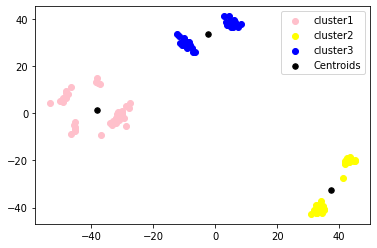

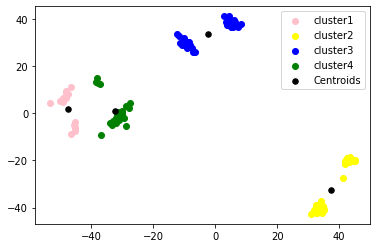

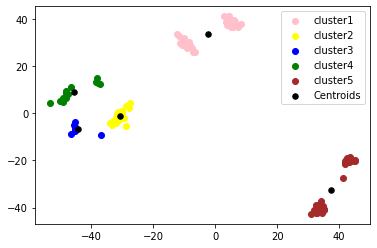

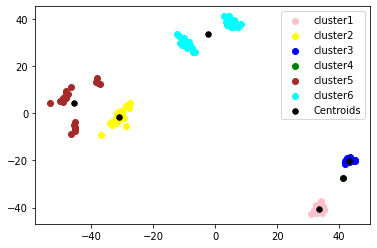

<Figure size 432x288 with 0 Axes>

In [36]:
mds_sum_of_squares = np.array([])
for i in range(3,7):
    opt, centroids = kmeans_clustering("hw2_mds.csv",i, "mds")
    mds_sum_of_squares = np.append(mds_sum_of_squares,sum_of_squares(opt, centroids, i))
    